1 завдання: Результат розв'язання методом бісекції. Корінь рівняння: 2.0


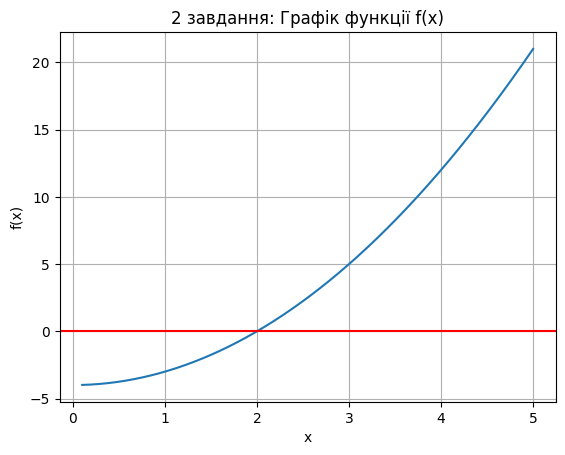

2 завдання: Уточнений корінь рівняння: 2.0
+---+------+------+------+---------------+---------+
| k | a(k) | x(k) | b(k) | |b(k) - a(k)| | f(x(k)) |
+---+------+------+------+---------------+---------+
| 1 |  1   | 3.0  |  5   |       4       |   5.0   |
| 2 |  1   | 2.0  | 3.0  |      2.0      |   0.0   |
+---+------+------+------+---------------+---------+
3 завдання: Корінь рівняння: 2.0


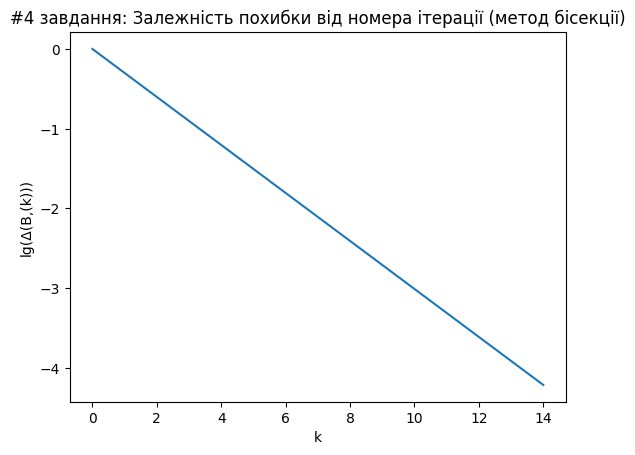

5 завдання: Перший корінь: x1 = 1.5000
5 завдання: Другий корінь: x2 = 2.0000
5 завдання: Третій корінь: x3 = 2.0000
7 завдання: Ітерація 1: x = 2.5000000000, delta = 1.5000000000, f(x) = 2.2500000000
7 завдання: Ітерація 2: x = 2.0500000000, delta = 0.4500000000, f(x) = 0.2025000000
7 завдання: Ітерація 3: x = 2.0006097561, delta = 0.0493902439, f(x) = 0.0024393962
7 завдання: Ітерація 4: x = 2.0000000929, delta = 0.0006096632, f(x) = 0.0000003717
7 завдання: Ітерація 5: x = 2.0000000000, delta = 0.0000000929, f(x) = 0.0000000000
7 завдання: Корінь рівняння є 2.0000000000
8 завдання: Корінь знайдено на x = 2.0000 після 4 ітерацій.


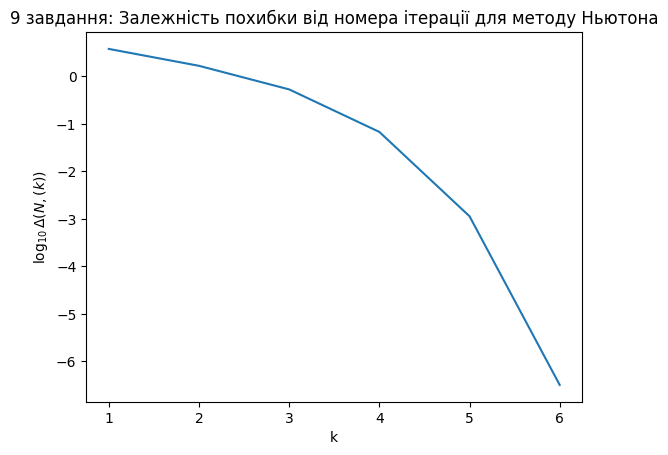

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import math

# 1 завдання: Функція для знаходження коренів методом бісекції
def f(x):
    return x * x - 4

def bisection(a, b, eps):
    if f(a) * f(b) > 0:
        return None

    # Додаткова перевірка на першій ітерації
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b

    while True:
        c = (a + b) / 2
        fc = f(c)

        # Перевірка на корінь на кожній ітерації
        if fc == 0 or abs(fc) < eps:
            return c

        if f(a) * fc < 0:
            b = c
        else:
            a = c

# Виклик функції для вхідних даних
root = bisection(1, 3, 1e-6)

if root is None:
    print("Метод бісекції не знайшов коренів.")
else:
    print(f"1 завдання: Результат розв'язання методом бісекції. Корінь рівняння: {root}")

# 2 завдання: Побудова графіка функції f(x)
x = np.linspace(0.1, 5, 1000)
y = [f(i) for i in x]

plt.plot(x, y)
plt.grid()
plt.axhline(y=0, color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('2 завдання: Графік функції f(x)')
plt.show()

# 2 завдання: Функція для знаходження коренів методом Ньютона
def df(x):
    return 2 * x

def newton(x0, eps):
    x = x0
    while True:
        x_next = x - f(x) / df(x)

        if abs(x_next - x) < eps:
            break

        x = x_next
    return x_next

# Виклик функції для вхідних даних
root = newton(2, 1e-4)
print(f"2 завдання: Уточнений корінь рівняння: {root}")

# 3 завдання: Метод бісекції з таблицею
def bisection_with_table(a, b, eps):
    table = PrettyTable()
    table.field_names = ['k', 'a(k)', 'x(k)', 'b(k)', '|b(k) - a(k)|', 'f(x(k))']
    k = 0

    while True:
        k += 1
        x = (a + b) / 2
        fa = f(a)
        fx = f(x)
        table.add_row([k, a, x, b, abs(b - a), fx])

        if abs(b - a) < eps or fx == 0:
            break

        if fa * fx < 0:
            b = x
        else:
            a = x

    print(table)
    return x

# Виклик функції для вхідних даних
root = bisection_with_table(1, 5, 1e-4)
print(f"3 завдання: Корінь рівняння: {root}")

# 4 завдання: Графік залежності похибки від номера ітерації для методу бісекції
a, b = 1, 2
epsilon = 1e-4
delta = [abs(b - a)]

while delta[-1] > epsilon:
    c = (a + b) / 2
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    delta.append(abs(b - a))

# Побудова графіку
plt.plot(range(len(delta)), [math.log10(d) for d in delta])
plt.xlabel("k")
plt.ylabel("lg(Δ(B,(k)))")
plt.title("#4 завдання: Залежність похибки від номера ітерації (метод бісекції)")
plt.show()

# 5 завдання: Пошук коренів методом Ньютона
def newton_method(f, df, x0, epsilon):
    x = x0
    while abs(f(x)) > epsilon:
        x = x - f(x) / df(x)
    return x

# Задаємо функцію та її похідну
f = lambda x: x * x - 4
df = lambda x: 2 * x

# Пошук коренів
x1 = (1 + 2) / 2  # Перший корінь
x2 = newton_method(f, df, 3, 1e-4)  # Другий корінь
x3 = newton_method(f, df, 6, 1e-4)  # Третій корінь

print(f"5 завдання: Перший корінь: x1 = {x1:.4f}")
print(f"5 завдання: Другий корінь: x2 = {x2:.4f}")
print(f"5 завдання: Третій корінь: x3 = {x3:.4f}")

# 7 завдання: Пошук кореня методом Ньютона з деталізацією ітерацій
def newton_method_with_iterations(f, df, x0, epsilon=1e-6, max_iter=100):
    x = x0
    for k in range(1, max_iter + 1):
        x_prev = x
        x = x - f(x) / df(x)
        delta = abs(x - x_prev)
        print(f'7 завдання: Ітерація {k}: x = {x:.10f}, delta = {delta:.10f}, f(x) = {f(x):.10f}')
        if delta < epsilon:
            return x
    print(f'Метод Ньютона не збігся за {max_iter} ітерацій')

# Виклик функції
root = newton_method_with_iterations(f, df, 1)
print(f'7 завдання: Корінь рівняння є {root:.10f}')

# 8 завдання: Пошук кореня методом Ньютона з обмеженням на кількість ітерацій
def newton_method_limited(f, df, x0, tol=1e-4, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new, i + 1
        x = x_new
    print("Досягнуто максимальної кількості ітерацій.")

# Пошук кореня
x0 = 1.5
x, n = newton_method_limited(f, df, x0)
print(f"8 завдання: Корінь знайдено на x = {x:.4f} після {n} ітерацій.")

# 9 завдання: Графік залежності похибки від номера ітерації для методу Ньютона
def newton_method_with_deltas(f, df, x0, tol=1e-4, max_iter=100):
    x = [x0]
    for k in range(max_iter):
        x.append(x[-1] - f(x[-1]) / df(x[-1]))
        delta = abs(x[-1] - x[-2])
        if delta < tol:
            break
    return x, k

# Виклик функції
x0 = 0.5
x, k = newton_method_with_deltas(f, df, x0)
deltas = [abs(x[i] - x[i - 1]) for i in range(1, len(x))]

# Побудова графіку
plt.plot(range(1, len(deltas) + 1), np.log10(deltas))
plt.xlabel('k')
plt.ylabel('$\\log_{10} \\Delta(N,(k))$')
plt.title('9 завдання: Залежність похибки від номера ітерації для методу Ньютона')
plt.show()
